### Small Area Population Distribution

To get the popultaion data for each small area in our shape file we will add data from the 2016 Census.

First we must import some libraries

In [1]:
import pandas as pd
import numpy as np 
import geopandas as gpd

Next we load our shape file and our census data. 

A link to the data 'https://www.cso.ie/en/census/census2016reports/census2016smallareapopulationstatistics/'

In [5]:
df1 = pd.read_csv('tabsmall.csv')
df2 = gpd.read_file('smallareas.shp')


Lets take a look at our data.

In [6]:
pd.set_option('display.max_columns', None)

df1

,OBJECTID_1,Nuts2,Nuts2 Name,Nuts3,Nuts3 Name,County,GU ID,CSO ED,OSI ED,ED Name,Small Area,Male,Female,Total,Housing Stock,Occupied,Unoccupied,Temporarily Absent,Other Vacant,% Vacant,Shape_Length,Shape_Area,x,y
0,140,IE05,Southern,IE052,South-East,Carlow,4c07d11e-1476-851d-e053-ca3ca8c0ca7f,1034,17034,Muinebeag (Bagenalstown) Urban,17034001,95,99,194,93,79,NaN,8.0,6.0,2.1,8978.539314,2.701945e+06,NaN,NaN
1,141,IE05,Southern,IE052,South-East,Carlow,4c07d11e-1477-851d-e053-ca3ca8c0ca7f,1034,17034,Muinebeag (Bagenalstown) Urban,17034011,102,84,186,115,93,2.0,5.0,15.0,6.8,8256.140035,2.336806e+06,NaN,NaN
2,142,IE05,Southern,IE052,South-East,Carlow,4c07d11e-1478-851d-e053-ca3ca8c0ca7f,1035,17035,Myshall,17035002,187,203,390,150,137,1.0,4.0,8.0,9.6,14663.139790,1.064133e+07,NaN,NaN
3,143,IE05,Southern,IE052,South-East,Carlow,4c07d11e-1479-851d-e053-ca3ca8c0ca7f,1032,17031,Leighlinbridge,17031005,171,172,343,135,117,1.0,7.0,10.0,18.8,10889.973570,2.827895e+06,NaN,NaN
4,144,IE05,Southern,IE052,South-East,Carlow,4c07d11e-147a-851d-e053-ca3ca8c0ca7f,1032,17031,Leighlinbridge,17031003,169,158,327,138,116,3.0,1.0,18.0,4.9,16260.048810,7.542927e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18636,18630,IE06,Eastern and Midland,IE061,Dublin,Fingal,4c07d11e-3a58-851d-e053-ca3ca8c0ca7f,4034,267123,Skerries,267123028,74,89,163,89,72,3.0,6.0,8.0,5.9,1180.068470,7.527091e+04,NaN,NaN
18637,18631,IE06,Eastern and Midland,IE061,Dublin,Fingal,4c07d11e-3a59-851d-e053-ca3ca8c0ca7f,4034,267123,Skerries,267123001,88,115,203,92,79,1.0,3.0,9.0,1.9,1249.789380,8.126244e+04,NaN,NaN
18638,18636,IE06,Eastern and Midland,IE061,Dublin,Fingal,4c07d11e-3a90-851d-e053-ca3ca8c0ca7f,4033,267118,Rush,267118018,139,141,280,93,91,NaN,1.0,1.0,4.7,1377.627528,8.767188e+04,NaN,NaN
18639,18637,IE06,Eastern and Midland,IE061,Dublin,Fingal,4c07d11e-3a91-851d-e053-ca3ca8c0ca7f,4033,267118,Rush,267118028,160,189,349,97,97,NaN,NaN,NaN,3.9,1449.376418,1.165882e+05,NaN,NaN


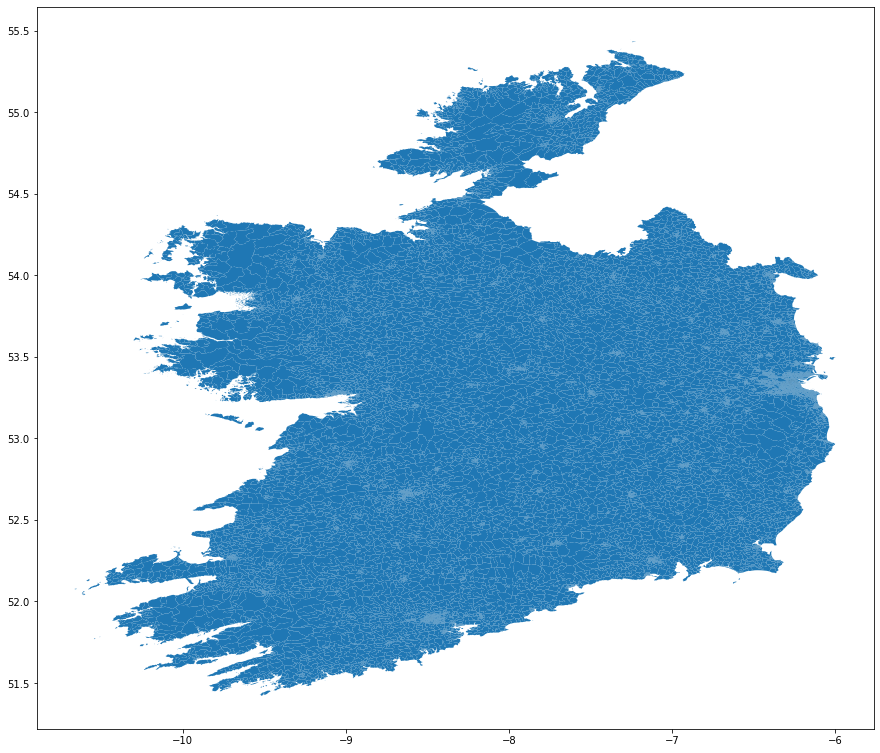

In [29]:
fig,ax = plt.subplots(figsize = (15,15))
df2.plot(ax = ax)

In [7]:
df1.rename(columns = {'OBJECTID_1':'OBJECTID'}, inplace = True)

In [9]:
df1.rename(columns = {'Total':'TotalPop'}, inplace = True)

In [11]:
df1.rename(columns = {'% Vacant':'VacantPercent'}, inplace = True)

### Merging Data

4. Below we will merge the data from our csv file to our shape file.
5. We will take the total population for each area along with any data relating to housing.

In [12]:
df3 = pd.merge(df2,
                 df1[['OBJECTID', 'TotalPop','Housing Stock','Occupied','Unoccupied','Temporarily Absent','VacantPercent']],
                 on='OBJECTID')
df3

,OBJECTID,GUID,NUTS1,NUTS1NAME,NUTS2,NUTS2NAME,NUTS3,NUTS3NAME,COUNTY,COUNTYNAME,CSOED,OSIED,EDNAME,SA_PUB2011,SMALL_AREA,GEOGID,AREA,CHANGECODE,ESRI_OID,Shape__Are,Shape__Len,geometry,TotalPop,Housing Stock,Occupied,Unoccupied,Temporarily Absent,VacantPercent
0,1,4c07d11d-f71d-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE053,South-West,CK,Cork County,18105,047014,Aultagh,047014001,047014001,A047014001,0,0,1,2.436209e+07,25179.376645,"POLYGON ((-9.09329 51.79897, -9.09309 51.79897...",154,75,61,2.0,2.0,6.3
1,2,4c07d11d-f71e-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE053,South-West,CK,Cork County,18107,047034,Ballymoney,047034002,047034002,A047034002,0,0,2,1.215051e+07,23595.409065,"POLYGON ((-8.98764 51.72759, -8.98742 51.72763...",283,108,94,2.0,5.0,18.5
2,3,4c07d11d-f71f-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE053,South-West,CK,Cork County,18018,047056,Boulteen,047056001,047056001,A047056001,0,0,3,9.331929e+06,18078.254302,"POLYGON ((-8.93013 51.72561, -8.93007 51.72566...",228,92,73,1.0,1.0,16.5
3,4,4c07d11d-f720-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE05,Southern,IE053,South-West,CK,Cork County,18030,047300,Teadies,047300001,047300001,A047300001,0,0,4,1.134573e+07,22123.902506,"POLYGON ((-8.92680 51.73688, -8.92685 51.73711...",180,118,78,20.0,1.0,2.1
4,5,4c07d11d-f564-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE04,Northern and Western,IE042,West,GY,Galway County,27157,067162,Letterfore,067162001,067162001,A067162001,0,0,5,8.135992e+07,71992.829074,"POLYGON ((-9.54482 53.42068, -9.54485 53.42069...",194,121,68,27.0,3.0,9.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18636,18637,4c07d11e-3b99-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,DR,DÃºn Laoghaire-Rathdown,05018,267036,Cabinteely-Granitefield,267036002,267036002,A267036002,0,0,18637,1.493571e+04,497.940601,"POLYGON ((-6.14090 53.26959, -6.14095 53.26953...",349,97,97,NaN,NaN,3.9
18637,18638,4c07d11e-3b9a-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,DR,DÃºn Laoghaire-Rathdown,05039,267080,Dundrum-Sandyford,267080007,267080007,A267080007,0,0,18638,1.004670e+04,462.357975,"POLYGON ((-6.24302 53.27999, -6.24303 53.28028...",148,107,75,NaN,7.0,6.1
18638,18639,4c07d11e-3b9b-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,DR,DÃºn Laoghaire-Rathdown,05037,267078,Dundrum-Balally,267078024 267078023/267078025,267078023/267078024/267078025,A267078024,0,1,18639,1.301185e+04,492.908907,"POLYGON ((-6.21417 53.27828, -6.21514 53.27721...",134,85,77,NaN,1.0,3.5
18639,18640,4c07d11e-3baa-851d-e053-ca3ca8c0ca7f,IE,Ireland,IE06,Eastern and Midland,IE061,Dublin,FL,Fingal,04002,267002,Balbriggan Rural,267002009,267002009,A267002009,0,0,18640,2.280690e+04,625.759061,"POLYGON ((-6.20373 53.61362, -6.20370 53.61351...",138,77,57,NaN,8.0,10.4


In [14]:
print(df3.crs)

{'init': 'epsg:4326'}


## Visualise Population Distribution

In [23]:
import matplotlib.pyplot as plt



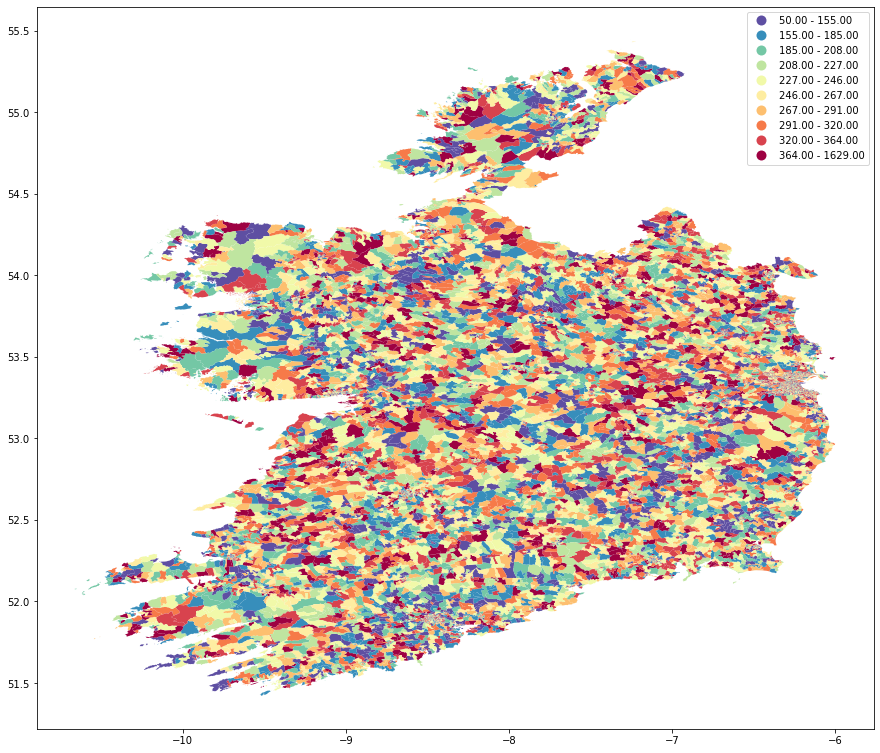

In [32]:
fig, ax = plt.subplots(figsize=(15,15), subplot_kw=dict(aspect='equal'))
df3.plot(column='TotalPop', scheme='Quantiles', 
        k=10, cmap='Spectral_r', legend=True, ax=ax)

#### Save the new shape shape file

In [34]:
df3.to_file("irl.shp",index=False)